In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io as sio

In [2]:
vortall_mat = sio.loadmat('VORTALL.mat')
X = vortall_mat['VORTALL']

In [3]:
# Compute full SVD
U,S,Vt = np.linalg.svd(X,full_matrices=0) # SVD of data

In [4]:
def plotFlow(X):    
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(X,(449,199))))
    V2 = V2.T

    minval = np.min(V2)
    maxval = np.max(V2)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2,cmap='hot',vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

    plt.scatter(49,99,5000,color='k')

    #plt.show()

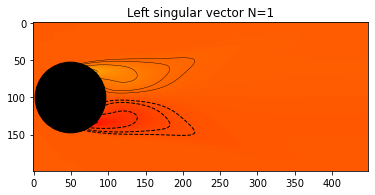

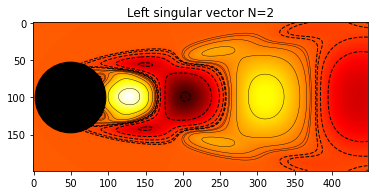

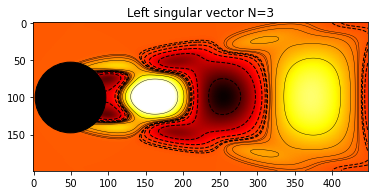

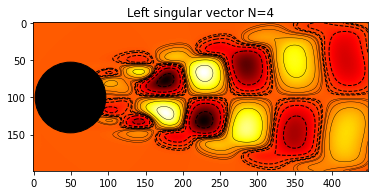

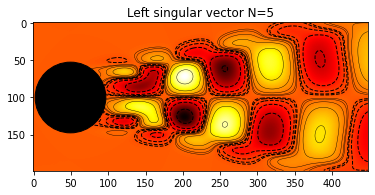

In [5]:
for i in range(5):
    plt.title('Left singular vector N=' + str(i+1))
    plotFlow(U[:,i])
    plt.show()

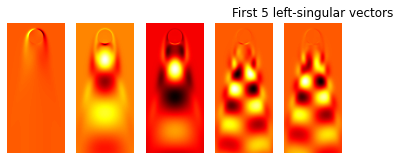

In [6]:
#Plotting first 5 left-singular vectors
fig, axs = plt.subplots(1,5)
for i in range(5):
    V = np.copy(np.real(np.reshape(U[:,i],(449,199))))
    axs[i].imshow(V, cmap = 'hot')
    axs[i].axis('off')
plt.title("First 5 left-singular vectors")
plt.show()

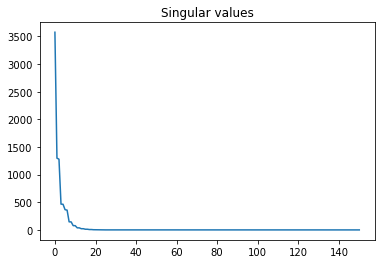

In [8]:
import imageio
def createMovie(X):
    plt.rcParams['figure.figsize'] = [8, 8]
    filenames = []
    for i in range(150):
        plotFlow(X[:,i])
        filename = '/Users/talukdarraianferdous/Documents/Fall 2022/Math - Data Driven Science/full'+str(i)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
    with imageio.get_writer('vortices.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

In [9]:
createMovie(X)

In [10]:
X_fro = np.linalg.norm(X, 'fro')
S2 = np.square(S)
energy_approx = np.sqrt(np.cumsum(S2))/X_fro
energy_approx

array([0.87078921, 0.92639865, 0.97740635, 0.98399342, 0.9904548 ,
       0.99445158, 0.99826628, 0.9988992 , 0.99952409, 0.99970059,
       0.99987589, 0.99991749, 0.99995884, 0.99997296, 0.999987  ,
       0.99999158, 0.99999611, 0.99999753, 0.99999894, 0.99999932,
       0.99999971, 0.99999981, 0.99999992, 0.99999995, 0.99999998,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [11]:
#r = 2 #captures 90%
#r = 5 #captures 99%
#r = 9 #captures 99.9%

In [12]:
r = 2
S_diag = np.diag(S)
Xapprox = U[:,:1] @ S_diag[0:1,:1] @ Vt[:1,:]
err = np.linalg.norm(X - Xapprox, 'fro')/ np.linalg.norm(X, 'fro')

In [13]:
createMovie(Xapprox)

In [14]:
#movie with r=2
err

0.4916565416251465

In [15]:
#movie with r = 5
Xapprox = U[:,:4] @ S_diag[0:4,:4] @ Vt[:4,:]
err = np.linalg.norm(X - Xapprox, 'fro')/ np.linalg.norm(X, 'fro')
createMovie(Xapprox)
print('Error is ' + str(err))

Error is 0.17820481419402828


In [16]:
#movie with r = 9
r = 9
Xapprox = U[:,:r] @ S_diag[0:r,:r] @ Vt[:r,:]
err = np.linalg.norm(X - Xapprox, 'fro')/ np.linalg.norm(X, 'fro')
createMovie(Xapprox)
print('Error is ' + str(err))

Error is 0.03084797286796539


In [17]:
r = 10
Xapprox = U[:,:r] @ S_diag[0:r,:r] @ Vt[:r,:]

In [18]:
W = S_diag[0:r,:r] @ Vt[:r,:]

In [19]:
W.shape

(10, 151)

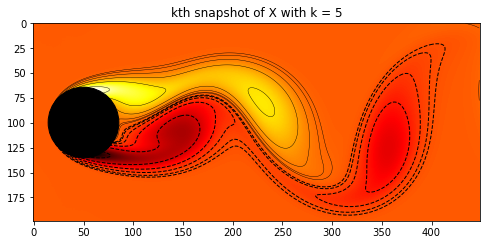

In [20]:
k = 5
plt.title('kth snapshot of X with k = ' + str(i+1))
plotFlow(X[:,k])
plt.show()

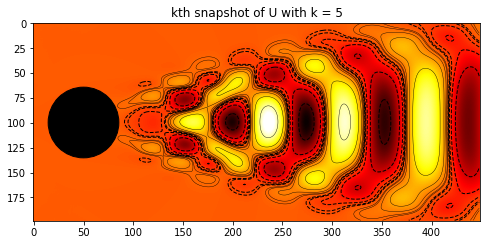

In [21]:
k = 5
plt.title('kth snapshot of U with k = ' + str(i+1))
plotFlow(U[:,k])
plt.show()

In [22]:
SVt = S_diag @ Vt
m = 20
W = SVt[:,:m-1]
W_prime = SVt[:,1:m]

WU, WS, WVT = np.linalg.svd(W, full_matrices=False)

In [23]:
WS_diag = np.diag(WS)
W_pinv = WVT.transpose() @ np.linalg.inv(WS_diag) @ WU.transpose()
A = W_prime @ W_pinv

In [24]:
eig_A = np.linalg.eig(A)

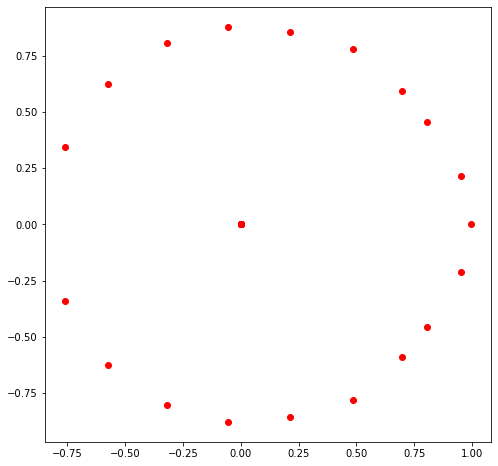

In [25]:
X = [x.real for x in eig_A[0]]
Y = [x.imag for x in eig_A[0]]
plt.scatter(X,Y, color='red')
plt.show()

In [26]:
w_old = SVt[:,:1]
w_ii = SVt[:,:1]
SVt_new = SVt[:,:1]
for i in range(1,151):
    w_new = A @ w_old
    SVT_new = np.append(SVt_new, w_new, axis=1)
    w_old = w_new

In [27]:
X_new = U @ SVt_new